In [1]:
import requests
from bs4 import BeautifulSoup


In [2]:
url = "http://books.toscrape.com/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the website!")
else:
    print("Failed to fetch the website.")


Successfully fetched the website!


In [3]:
soup = BeautifulSoup(response.text, 'html.parser')


 Extract Book Titles

In [4]:
books = soup.find_all("h3")
for book in books:
    title = book.a["title"]
    print(title)


A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


 Extract Book Prices

In [5]:
prices = soup.find_all("p", class_="price_color")
for price in prices:
    print(price.text)


Â£51.77
Â£53.74
Â£50.10
Â£47.82
Â£54.23
Â£22.65
Â£33.34
Â£17.93
Â£22.60
Â£52.15
Â£13.99
Â£20.66
Â£17.46
Â£52.29
Â£35.02
Â£57.25
Â£23.88
Â£37.59
Â£51.33
Â£45.17


Extract Star Ratings

In [6]:
ratings = soup.find_all("p", class_="star-rating")
for rating in ratings:
    print(rating["class"][1]) 
 # The second class holds the rating (e.g., "Three", "Five", etc.)


Three
One
One
Four
Five
One
Four
Three
Four
One
Two
Four
Five
Five
Five
Three
One
One
Two
Two


Book Availability (In Stock / Out of Stock)

In [7]:
availabilities = soup.find_all("p", class_="instock availability")
for availability in availabilities:
    print(availability.text.strip())


In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock
In stock


Book Links & Visit Individual Book Pages


In [8]:
base_url = "http://books.toscrape.com/"
books = soup.find_all("h3")

for book in books:
    book_link = base_url + book.a["href"]
    print(book_link)


http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
http://books.toscrape.com/catalogue/soumission_998/index.html
http://books.toscrape.com/catalogue/sharp-objects_997/index.html
http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
http://books.toscrape.com/catalogue/the-requiem-red_995/index.html
http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
http://books.toscrape.com/catalogue/the-black-maria_991/index.html
http://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
http://books.toscrape.com/cata

Book Genre (Category)

In [9]:
categories = soup.find("ul", class_="nav nav-list").find_all("a")
for category in categories:
    print(category.text.strip())


Books
Travel
Mystery
Historical Fiction
Sequential Art
Classics
Philosophy
Romance
Womens Fiction
Fiction
Childrens
Religion
Nonfiction
Music
Default
Science Fiction
Sports and Games
Add a comment
Fantasy
New Adult
Young Adult
Science
Poetry
Paranormal
Art
Psychology
Autobiography
Parenting
Adult Fiction
Humor
Horror
History
Food and Drink
Christian Fiction
Business
Biography
Thriller
Contemporary
Spirituality
Academic
Self Help
Historical
Christian
Suspense
Short Stories
Novels
Health
Politics
Cultural
Erotica
Crime


SAVING DATA INTO CSV FILE

In [10]:
import csv

with open("books.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Price", "Rating", "Availability"])
    
    for book, price, rating, availability in zip(books, prices, ratings, availabilities):
        writer.writerow([book.a["title"], price.text, rating["class"][1], availability.text.strip()])


Exploratory Data Analysis

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("books.csv")

# cleaning Data, conversion of Price to float
df["Price"] = df["Price"].apply(lambda x: ''.join(filter(str.isdigit, x.split("Â")[-1]))).astype(float)

print(df["Price"].head())



0    5177.0
1    5374.0
2    5010.0
3    4782.0
4    5423.0
Name: Price, dtype: float64


In [12]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


Dataset contains 20 rows and 4 columns.
Title           0
Price           0
Rating          0
Availability    0
dtype: int64
Title           object
Price           object
Rating          object
Availability    object
dtype: object


DATA CLEANING

In [ ]:
#Conversion of ratings from words to Numbers
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating"] = df["Rating"].map(rating_map)


SUMMARY

In [17]:
print(df.describe())


             Price     Rating
count    20.000000  20.000000
mean   3804.850000   2.850000
std    1513.523052   1.565248
min    1399.000000   1.000000
25%    2263.750000   1.000000
50%    4138.000000   3.000000
75%    5186.500000   4.000000
max    5725.000000   5.000000


VISUALIZATION

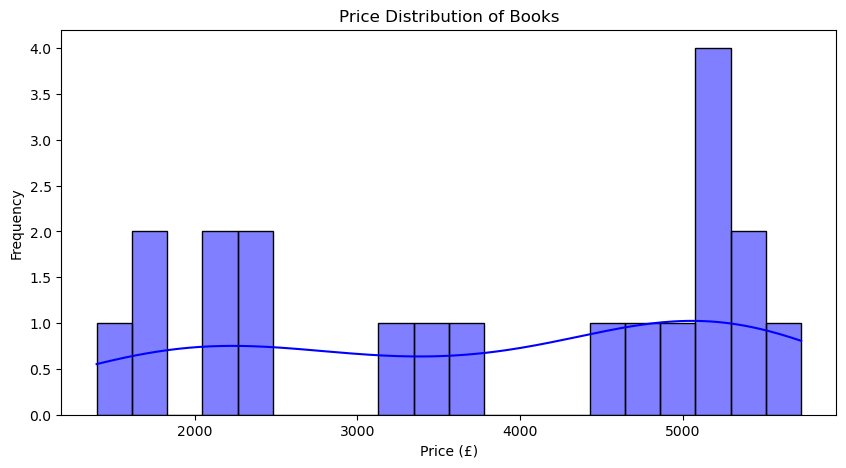

In [ ]:
#Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=20, kde=True, color="blue")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.title("Price Distribution of Books")
plt.show()


/tmp/ipykernel_2049674/506589845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Rating"], palette="mako")


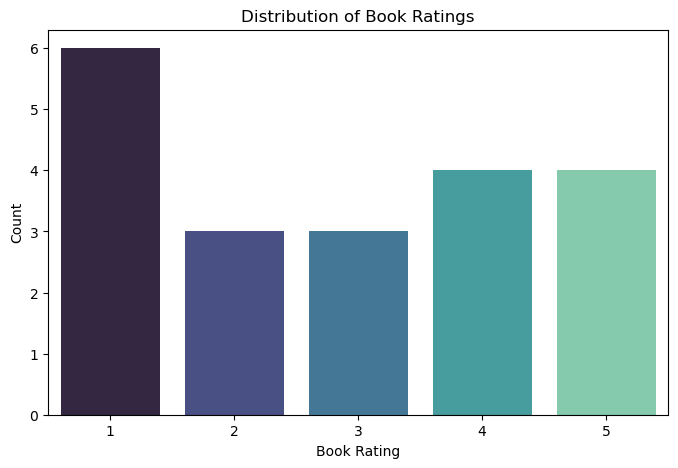

In [ ]:
#Book Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Rating"], palette="mako")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Distribution of Book Ratings")
plt.show()


/tmp/ipykernel_2049674/3382447542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Rating"], y=df["Price"], palette="viridis")


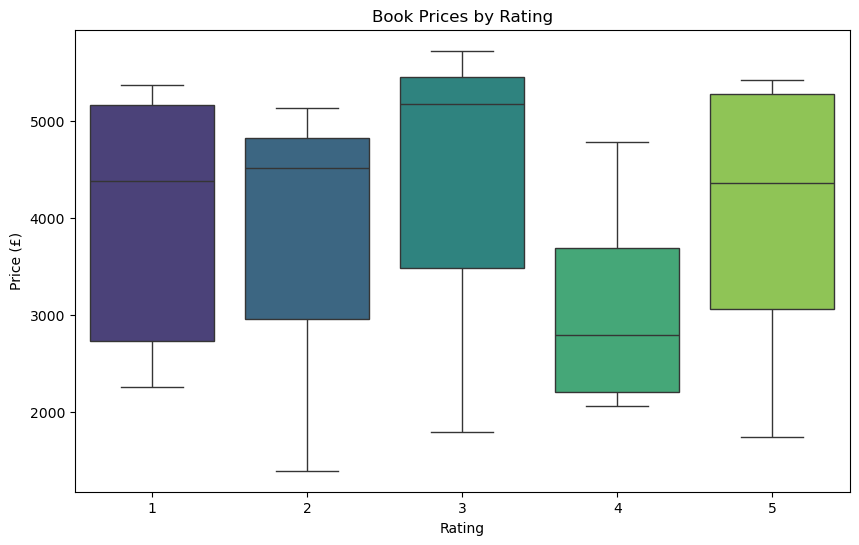

In [21]:
#Price vs. Ratings (Correlation)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Rating"], y=df["Price"], palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.title("Book Prices by Rating")
plt.show()


In [22]:
#Most Expensive Books
print(df.nlargest(10, "Price")[["Title", "Price", "Rating"]])

                                                Title   Price  Rating
15  Our Band Could Be Your Life: Scenes from the A...  5725.0       3
4               Sapiens: A Brief History of Humankind  5423.0       5
1                                  Tipping the Velvet  5374.0       1
13  Scott Pilgrim's Precious Little Life (Scott Pi...  5229.0       5
9                                     The Black Maria  5215.0       1
0                                A Light in the Attic  5177.0       3
18                       Libertarianism for Beginners  5133.0       2
2                                          Soumission  5010.0       1
3                                       Sharp Objects  4782.0       4
19                            It's Only the Himalayas  4517.0       2
